# Közönséges differenciálegyenletek érzékenységvizsgálata

Tekintsünk egy $\dot{x}(t)=f(t,x(t),p)$, $x(0)=x_0$ elsőrendű közönséges differenciálegyenletre felírt kezdeti érték problémát. Kérdés, hogy kezdeti érték ($x_0$) és a modell paraméterek ($p$) megváltozása hogyan befolyásolja a megoldásokat. Eljárhatunk például úgy, hogy az $x(t,p,x_0)$ megoldást a paraméter és a kezdeti érték szerint sorba fejtjük és a más bemenő adatokhoz tartozó megoldásokat lineárisan közelítjük:
$$
x(t,p',x_0')\approx x(t,p,x_0) + \partial_p x(t,p,x_0)(p'-p) + \partial_{x_0}x(t,p,x_0)(x_0'-x_0). 
$$

A fenti formulában szereplő $\partial_p x(t,p,x_0)$ és $\partial_{x_0}x(t,p,x_0)$ érzékenységi együtthatók az $f$ függvényre kirótt bizonyos differenciálhatósági feltételek teljesülése esetén kielégítenek egy inhomogén lineáris differenciálegyenlet rendszert, melyet *variációs egyenletnek* hívunk.

\begin{theorem}
Ha $\Omega\subset\mathbb{R}^{m+n+1}$ tartomány, $f:\Omega\to\mathbb{R}^n$, $(t,x,p)\mapsto f(t,x,p)$ folytonos függvény, továbbá az $\partial_x f$ és $\partial_p f$ parciális deriváltak is léteznek és folytonosak $\Omega$-n, akkor az $x(t,p,x_0)$ megoldás a $p$ paraméter szerint differenciálható és az $y:=\partial_p x\in\mathbb{R}^{n\times m}$ mátrix-értékű érzékenységi együttható a
\begin{align}
\dot{y} = \partial_x f(t,x(t,p,x_0),p)y+\partial_p f(t,x(t,p,x_0),p)
\end{align}
kezdeti érték probléma megoldásaként kapható meg.
\end{theorem}

A következő példában megmutatjuk, hogy az érzékenységi együtthatók az automatikus differenciálás segítségével hogyan határozhatók meg közvetlenül, azaz a variációs egyenlet felírása és integrálása nélkül.

## Példa: egy egyszerű megfordítható kémiai reakció érzékenységvizsgálata

A 2-butén (szabályos IUPAC nevén but-2-én) egy négyatomos egyszeresen telítetlen szénhidrogén $H_3C-CH=CH-CH_3$, melynek van cisz és transz izomerje attól függően, hogy a lánc végein lévő szénatomok a kettős kötés azonos vagy átellenes oldalán helyezkednek el: ![Inga](./2-butene.png) 

Míg az egyszeres kötés "könnyen tud forogni", addig kettős kötés ilyen szempontból gátolt, ugyanis az izomerizáció (izomerek egymásba alakulása, "átfordulás") csak a kettős kötést alkotó ún. $\pi$-kötés felhasadása árán valósulhat meg, amihez energia szükséges. Az gyakorlatban ez ultraibolya fénnyel történő megvilágítással vagy hőközlés útján valósulhat meg például. Erős savak (mint katalizátorok) jelenlétében az izomerizáció szobahőmérsékleten is végbemegy.

Jelölje A a cisz, B pedig a transz izomert, $c_A$ és $c_B$ pedig a két speciesz pillanatnyi koncentrációját a reakcióelegyben. Az izomerek oda-vissza történő egymásba alakulását a
\begin{align}
A &\stackrel{k_1}{\longrightarrow} B, \,\,E_a=+60\,KJ/mol\\
B &\stackrel{k_{-1}}{\longrightarrow} A, \,\,E_a=+80\,KJ/mol
\end{align}
egyenletek írják le, ahol $k_1$ és a $k_{-1}$ reakciósebességi állandók viszonya $k_1>k_{-1}$, ami azért van, mert a kettős kötés körüli metil-csoportok taszítják egymást (sztérikus gátlás, nem férnek el egymás mellett), ezért amikor kettőskötés újra létrejön, akkor nagyobb valószínűséggel rögzül a transz állapot, mint a cisz. Végső soron a cisz$\to$transz izomerizáció gyorsabban megy végbe, mint a fordított irányú folyamat és beáll egy egyensúlyi állapot (Bizonyítsuk be matematikailag!), melyben $\frac{c_B (\infty)}{c_A (\infty)}=\frac{k_{1}}{k_{-1}}=:K$ teljesül, ahol $K$-t kémiai egyensúlyi állandónak nevezik. Az átalakulás dinamikáját a
\begin{align}
\dot{c}_A &= -k_1 c_A + k_{-1} c_B \\
\dot{c}_B &=  k_1 c_A - k_{-1} c_B
\end{align}
differenciálegyenlet rendszer írja le. Mivel $c_A+c_B=c_A(0)=:c_0$ állandó a folyamat során, elég csak a
$$
\dot{c}_B = k_1 (c_0-c_B)-k_{-1} c_B
$$
egyenletet tekinteni.

Legyen $c_0=1.0$ mol/l, $c_B(0)=0.0$ mol/l (tiszta cisz izomerből indulunk), a (fiktív) reakciósebességi állandók pedig legyenek $k_1 = 1.1\,s^{-1}$ és $k_{-1} = 0.9\,s^{-1}$.

**Szimuláljuk a rekaciót és számoltassuk ki az $|\partial c_B/\partial k_1|$ és $|\partial c_B/\partial k_{-1}|$ érzékenységi paramétereket!**

<IPython.core.display.Javascript object>


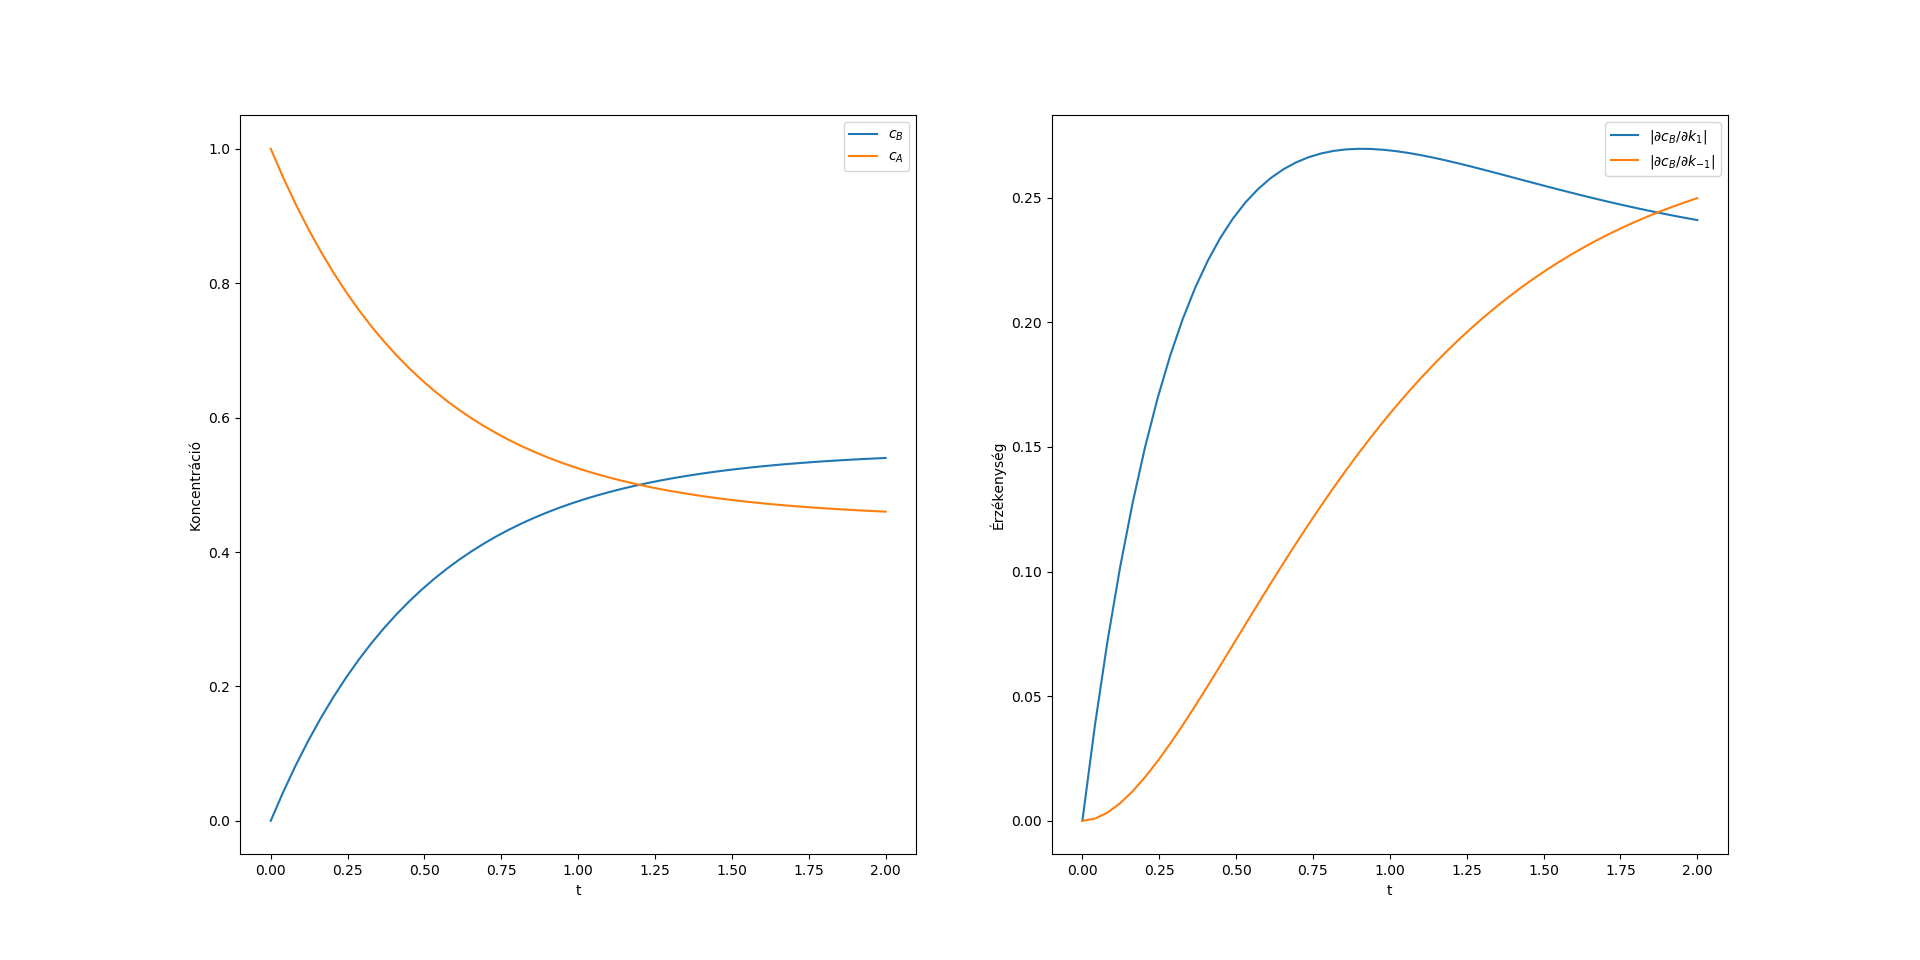

In [4]:
%matplotlib notebook
import autograd.numpy as np
from autograd.scipy.integrate import odeint
from autograd import jacobian
from autograd.builtins import tuple

import matplotlib.pyplot as plt

# kezdeti koncentrációk
c0 = 1.0
cB0 = 0.0

# megoldási tartomány
tspan = np.linspace(0, 2.0)

# a megoldás mint a sebességi együtthatók függvénye
def C(K):
    k1, k_1 = K
    # az egyenlet jobb oldala
    dcBdt = lambda cB, t, k1, k_1: k1*(c0-cB)-k_1*cB
    sol = odeint(dcBdt, cB0, tspan, tuple((k1, k_1)))
    return sol

# sebességi együtthatók
k1, k_1 = 1.1, 0.9 

# a megoldás
cB = C([k1, k_1])

# érzékenységvizsgálat
dcBdk = jacobian(C,0)
k_sensitivity = dcBdk(np.array([k1, k_1]))
k1_sensitivity = k_sensitivity[:, 0, 0]
k_1_sensitivity = k_sensitivity[:, 0, 1]

# Ábrázolás    
fig = plt.figure(figsize=2.0*plt.figaspect(0.5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(tspan, cB, label='$c_B$')
ax1.plot(tspan, c0-cB, label='$c_A$')
ax1.set_xlabel('t')
ax1.set_ylabel('Koncentráció')
ax1.legend(loc='best')

ax2.plot(tspan, np.abs(k1_sensitivity), label='$|\partial c_B/\partial k_1|$')
ax2.plot(tspan, np.abs(k_1_sensitivity), label='$|\partial c_B/\partial k_{-1}|$')
ax2.set_xlabel('t')
ax2.set_ylabel('Érzékenység')
ax2.legend(loc='best')

## Feladat: érzékenységvizsgálat a Michaelis-Menten modellben

Az enzimek élő szervezetek szempontjából nélkülözhetetlen biokatalizátorok, melyek új reakcióutakat nyitnak meg, ezáltal csökkentve a katalizált kémiai reakció aktiválási energiáját biztosítva ezzel, hogy a reakció fiziológiás körülmények között is végbemehessen.

Az enzimek működésének egyszerű leírását adja a Michaelis-Menten modell. A szubsztrát (S) átalakulása termékké (P) az enzim hiányában elenyésző sebességgel menne csak végbe. Az enzim (E) jelenlétében a folyamat jelentősen felgyorsul az által, hogy a szubsztrát reverzibilisen kötődik az enzimhez és a létrejövő enzim-szubsztrát komplex könnyen átalakul termékké:
$$
S + E \stackrel{k_1,\,k_{-1}}{\longleftrightarrow} ES \stackrel{k_2}{\longrightarrow}E+P
$$

**1. Készítsünk szimulációt egy hipotetikus enzimre, ahol $k_2\gg k_{-1}>k_1$, kezdetben csak szubsztrát és enzim van, enzimből pedig sokkal kevesebb van, mint szubsztrátból.**

**2. A butadién izomerizációs feldata mintájára végezzünk érzékenységvizsgálatot.**

# Bifurkációk

Bifurkáció alatt azt a jelenséget értjük, amikor a differenciálegyenletben szereplő paraméterek kismértékű megváltozásának hatására a megoldások kvalitatív viselkedése drámai változást szenved. Ez az integrálgörbék (megoldások) topologikus tulajdonságának megváltozásában nyilvánul meg, ami jelentheti például
* az egyensúlyi pontok stabilitásának megváltozását 
* az egyesúlyi pontok megjelenését és eltűnését
* periodikus pályák eltűnését, stb.

A következő szimulációban egy logisztikus növekedési modellt követő populáció túlhalászásának példáján kersztül láthatjuk, amint a fázistéren a halászati kvóta paraméter megnövelésének hatására a stabilis és instabilis egyensúlyi pont összeolvad és kioltja egymást. Ezt a fajta bifurkációt nyereg-csomó (saddle-node) bifurkációnak nevezik és a lokális bifurkációk közé sorolják.

## Példa: logisztikus növekedés túlhalászással

Tegyük fel hogy egy halnevelő telepet üzemeltetünk. A tóban a halpopuláció méretét $k>0$ lehalászási kvóta mellett a
$$
\dot{x} = x\left(1-\frac{x}{200}\right)-k
$$
differenciálegyenlet írja le.

A következő program az interaktív módon változtatható $k$ kvóta függvényében ábrázolja a fenti egyenlet fázisképét az egyensúlyi pontokat jelölve, kirajzolja az iránymezőt és az $x_0=30$, $x_0=100$ és $x_0=200$ kezdeti feltételekhez tartozó integrálgörbéket.

<IPython.core.display.Javascript object>


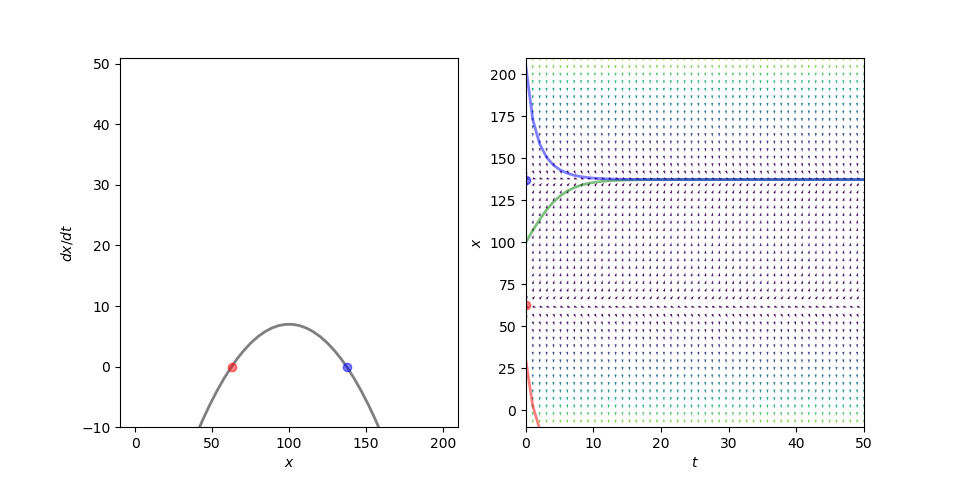

interactive(children=(FloatSlider(value=50.0, description='k', max=60.0, step=0.5), Output()), _dom_classes=('…

In [5]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import autograd.numpy as np 
from scipy.integrate import odeint

# A differenciálegyenlet jobb oldala
population_dynamics = lambda x, t, k: x*(1-x/200)-k

# Integrációs intervallum (alapból 100 részre osztja)
T = 50.0
tspan = np.linspace(0, T)
xspan = np.linspace(-10.0,210.0)

# Ábrázolás    
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(121, axisbelow=True)
ax2 = fig.add_subplot(122, axisbelow=True)

# Fáziskép
ax1.set_xlabel('$x$')
ax1.set_ylabel('$dx/dt$')
ax1.set_xlim(xspan[0],xspan[-1])
ax1.set_ylim(-10.0, 51.0)

dxdt, = ax1.plot([], [], 'k-', alpha=0.5, lw=2)  # a jobb oldal
p1,   = ax1.plot([], [], 'ro', alpha=0.5, lw=2) # az instabil egyensúlyi pont
p2,   = ax1.plot([], [], 'bo', alpha=0.5, lw=2) # a stabil egyensúlyi pont

# Iránymező és integrálgörbék
ax2.set_xlabel('$t$')
ax2.set_ylabel('$x$')
ax2.set_xlim(0.0,T)
ax2.set_ylim(xspan[0],xspan[-1])

# Az iránymező
X, Y = np.meshgrid(tspan, xspan)
field = ax2.quiver(X, Y, [], [], [], alpha=1)

P1,   = ax2.plot([], [], 'ro', alpha=0.5, lw=2) # az instabil egyensúlyi pont
P2,   = ax2.plot([], [], 'bo', alpha=0.5, lw=2) # a stabil egyensúlyi pont

# Kezdeti értékek
x0 = [30.0, 100.0, 205.0]

# Integrálgörbék
x1, = ax2.plot([], [], 'r-', alpha=0.5, lw=2)  
x2, = ax2.plot([], [], 'g-', alpha=0.5, lw=2) 
x3, = ax2.plot([], [], 'b-', alpha=0.5, lw=2)

@interact(k=(0.0,60.0,0.5))
def simulation(k=50.0):
    """
    Nyereg-csomó bifurkáció interaktív szimulációja a túlhalászás modellben
    """
    
    # Fáziskép újrarajzolása
    dxdt.set_data(xspan, population_dynamics(xspan, 0.0, k))
    
    # Iránymező újrarajzolása
    dt = np.ones_like(X)
    dx = population_dynamics(Y, 0.0, k)
    color = np.sqrt(dt**2.0+dx**2.0)
    field.set_UVC(dt/color, dx/color, color)
    
    # Integrálgörbék újrarajzolása
    for i, xi in enumerate([x1, x2, x3]):
        sol = odeint(population_dynamics, x0[i], tspan, args=(k,))
        sol = sol.flatten() 
        
        # numerikus artifact-ok kiszűrése (ha a diszkrimináns negatív, 
        # akkor véges idő alatt -végtelen a megoldás, de ezt a solver nem tudja kezelni,
        # hanem "átugorja" a szingularitást és megindul pozitív irányba
        artifact, = np.where(sol<xspan[0])
        if artifact.size>0:
            sol[artifact[0]:]=xspan[0]-1
         
        xi.set_data(tspan,sol)
    
    # Egyensúlyi pontok jelölése (amennyiben vannak)
    if k<=50:  # ekkor a diszkrimináns pozitív és vannak egyensúlyi pontok
        
        z0 = 100.0*(1-np.sqrt(1-k/50.0))
        z1 = 100.0*(1+np.sqrt(1-k/50.0))
        
        p1.set_data([z0],[0.0])
        p2.set_data([z1],[0.0])
        
        P1.set_data([0.0],[z0])
        P2.set_data([0.0],[z1])
        
    else:  # ekkor a diszkrimináns negatív és nincsenek egyensúlyi pontok
        p1.set_data([],[])
        p2.set_data([],[])
        
        P1.set_data([],[])
        P2.set_data([],[])
        

## Feladat

Nyereg-csomó bifurkációra kétdimenziós példát szolgáltat a
\begin{align}
\dot{x} &= \alpha - x^2\\
\dot{y} &= -y
\end{align}
differenciálegyenlet rendszer, melynek
* $\alpha<0$ esetén nincsen egyensúlyi helyzete,
* $\alpha=0$ esetén egy elfajult csomó figyelhető meg,
* $\alpha>0$ paraméter választás mellett pedig két egyensúlyi pont van, melyek közül az egyik nyereg, a másik pedig csomó.

Írjunk programot, mely kirajzolja a fenti egyenlet fázisképét (quiver), továbbá

* jelöli az egyensúlyi pontokat és azok jellegét (kék pont: stabil, piros pont: instabil egyensúlyi helyzet).
* az $\alpha$ paraméter egy csúszka segítségével $-1$ és $1$ között $0.02$-es lépésközzel interaktív módon változtatható legyen.

**Szorgalmi feladat: olvasson utána, hogy milyen más lokális és globális bifurkáció típusok léteznek, keressen példát kétdimenziós autonóm rendszerek körében és készítsen a fentihez hasonló demonstrációt.** (ez könnyű feladat, minden jó példát külön beadott feladatként értékelek)

# További olvasnivalók

1. http://garfield.chem.elte.hu/COST_Training_School_2016/overheads/Turanyi_1-2_Local_Sensitivity_Analysis.pdf (Turányi Tamás előadása, ELTE)

2. https://docplayer.hu/17284325-Oszcillalo-bio-kemiai-modellek-erzekenysegenek-vizsgalata-tdk-dolgozat-sipos-szabo-eszter.html

3. https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.428.6699&rep=rep1&type=pdf (a példát innen vettem)

4. https://kitchingroup.cheme.cmu.edu/blog/2019/09/13/Sensitivity-analysis-with-odeint-and-autograd/ 

5. https://ieeexplore.ieee.org/document/5693915 (lokális érzékenységvizsgálat alkalmazása a szívben előforduló ún. L-típusú kalcium csatornák modellezésére)

6. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0200917 (lokális és globális érzékenységvizsgálat véralvadás modellezésére)

7. https://en.wikipedia.org/wiki/Bifurcation_theory (Bifurkációk)

8. https://faculty.sfasu.edu/judsontw/ode/html-20180819/firstlook07.html (A Bifurkációs példát innen vettem)

9. http://digipac.ca/chemical/equilibrium/buteneeq.htm (a but-2-én-es példát innen vettem)